In [1]:
import pyarrow.parquet as pq
import pandas as pd
import os

folder_path = '30G_data/'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# data = {
#     "id": [],
#     "timestamp": [],
#     "user_name": [],
#     "chinease_name": [],
#     "email": [],
#     "age": [],
#     "income": [],
#     "gender": [],
#     "country": [],
#     "chinese_address": [],
#     "puchase_history": [],
#     "is_active": [],
#     "registration_date": [],
#     "credit_score": [],
#     "phone_number": [],
# }

data = {'id': [], 'income': [], 'age': [], 'credit_score': [], 'is_active': [], 'gender': []} 

df=pd.DataFrame()
# income_df.head()

#由于30G太大无法将全部数据装入内存，因此选择分批次地读取指定列到内存中
for file_path in parquet_files:
    file_path = os.path.join(folder_path, file_path)
    file = pq.ParquetFile(file_path)
    data = file.read().to_pandas()
    data = data[['id','income','age', 'credit_score', 'is_active', 'gender']]
    df=pd.concat([df, data],ignore_index=True)
df.shape

(300000000, 6)

In [2]:
df.head()

,id,income,age,credit_score,is_active,gender
0,1,73000.0,36,423,False,女
1,2,223000.0,58,567,False,女
2,3,858000.0,88,767,False,男
3,4,485000.0,61,587,False,男
4,5,437000.0,33,404,False,男


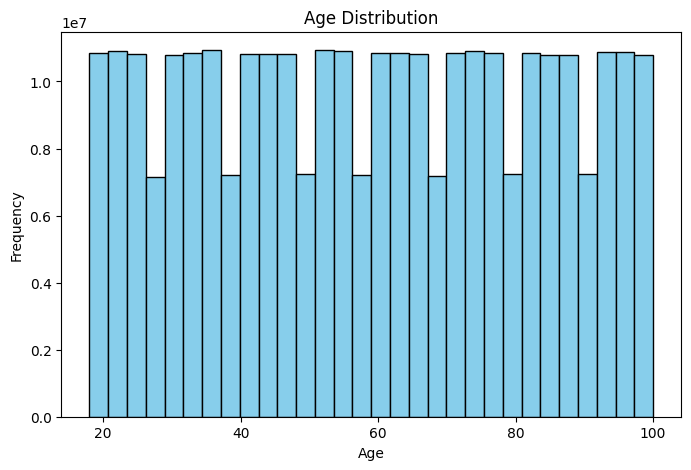

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

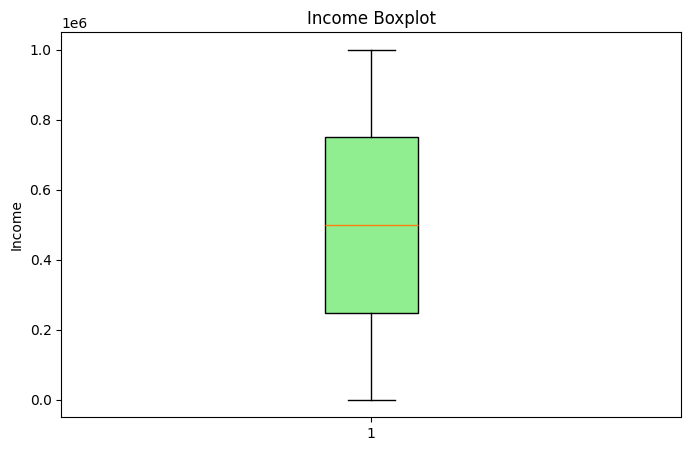

In [8]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['income'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Income Boxplot")
plt.ylabel("Income")
plt.show()

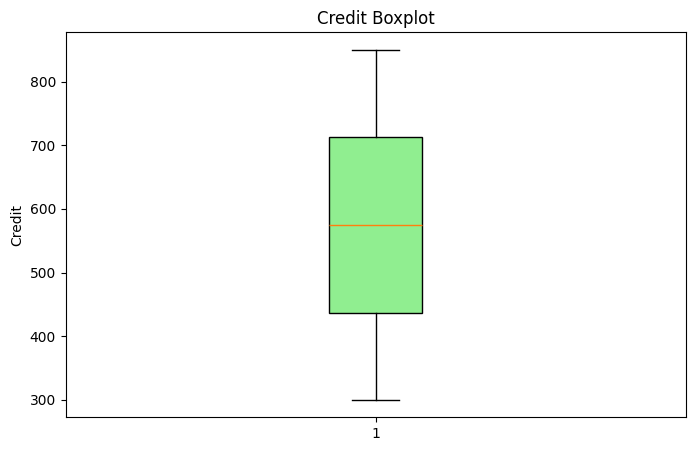

In [10]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['credit_score'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Credit Boxplot")
plt.ylabel("Credit")
plt.show()

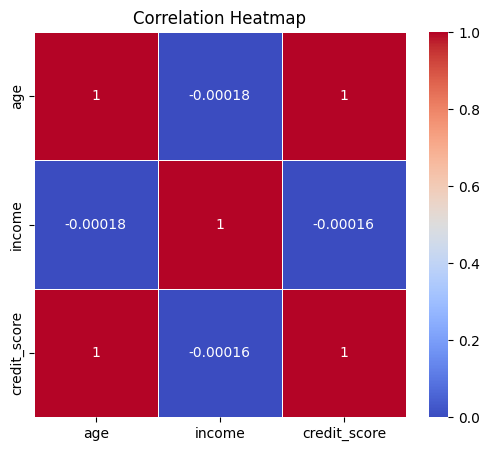

In [12]:
import seaborn as sns

# 只选取数值型变量进行相关性分析
numeric_cols = ['age', 'income', 'credit_score']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

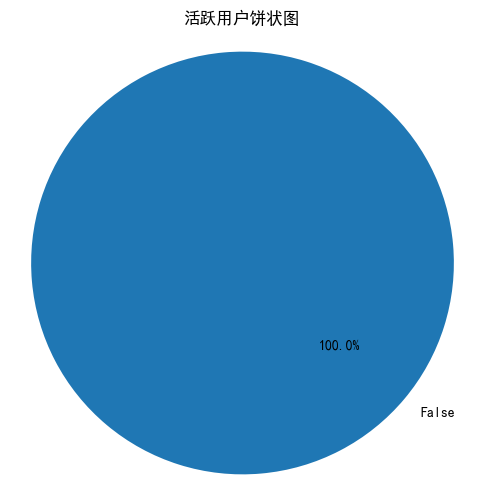

In [14]:
import matplotlib.pyplot as plt

active_counts = df['is_active'].value_counts()

labels = active_counts.index.astype(str)
sizes = active_counts.values

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('活跃用户饼状图')
plt.axis('equal')
plt.show()

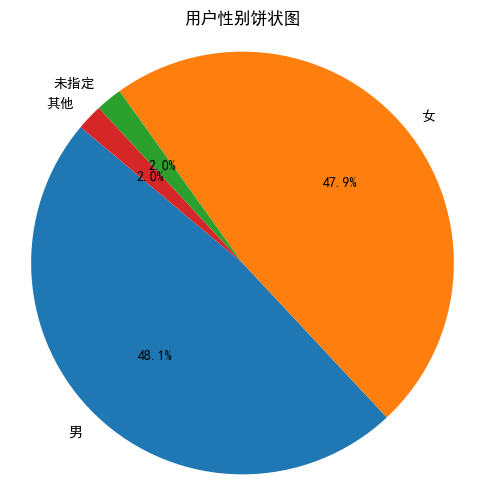

In [16]:
gender_counts = df['gender'].value_counts()

labels = gender_counts.index.astype(str)
sizes = gender_counts.values

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('用户性别饼状图')
plt.axis('equal')
plt.show()

In [18]:
# 去除年龄较大的异常值
df = df[(df['age'] <= 65)]

# 去除收入过低的异常值
df = df[(df['income'] > 10000)]

# 去除性别缺失值
df = df[(df['gender'] != '未指定') & (df['gender'] != '其他')]

df.shape

(164738818, 6)

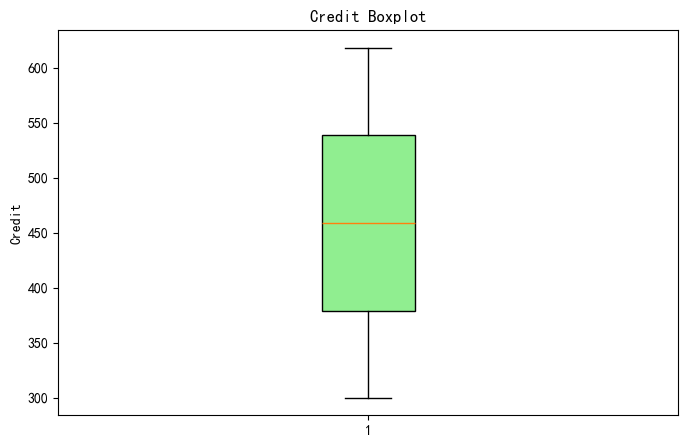

In [20]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['credit_score'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Credit Boxplot")
plt.ylabel("Credit")
plt.show()

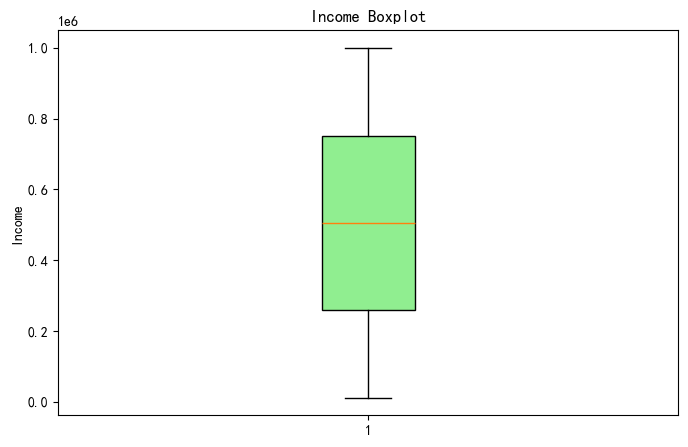

In [22]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['income'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Income Boxplot")
plt.ylabel("Income")
plt.show()

In [24]:
# 定义收入阈值
income_threshold = 80000

# 定义信用积分阈值
credit_threshold = 600

# 筛选高价值用户
high_value_users = df[
    (df['income'] >= income_threshold) &
    (df['credit_score'] >= credit_threshold)
]

# 统计高价值用户数量
print(f"高价值用户数量：{high_value_users.shape[0]}")
print(f"高价值用户占比：{high_value_users.shape[0] / df.shape[0]}")

高价值用户数量：8933074
高价值用户占比：0.05422567739923932
